
# **Simple multi-layer perceptron**


In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils.np_utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
import numpy as np

**Set vars, load MNIST (hand written digits) data**

In [6]:
batch_size = 3000
num_classes = 10
epochs = 5

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
np.sum(y_train==8)

5851

**Visualize data**

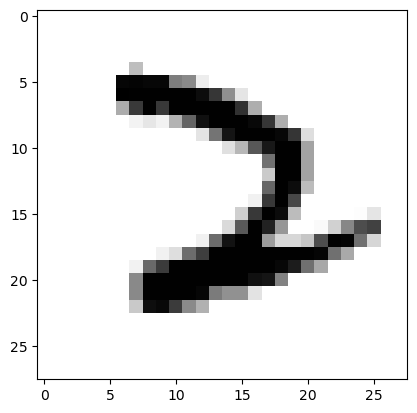

2


In [5]:
import matplotlib.pyplot as plt

plt.imshow(x_train[3890],cmap=plt.cm.binary)
plt.show()
x_train[0].shape

print(y_train[3890])

In [9]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train[0:20]

60000 train samples
10000 test samples


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [10]:
y_train.shape

(60000,)

In [11]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

y_train.shape

(60000, 10)

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [38]:
y_train[0:20,:] # (5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9) --> not binarized, it is categorized

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

**Model description**

- Put the "lego blocks" together


In [18]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,))) # input is 784 connected to 64 neurons, relu is the activation function
#model.add(Dropout(0.2)) # 20% of the neurons are dropped
model.add(Dense(32, activation='relu')) # 64 neurons connected to 32 neurons
#model.add(Dropout(0.2)) # 20% of the neurons are dropped
model.add(Dense(num_classes, activation='softmax')) # softmax is the activation function for the output layer

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


**Visualization of the model**

In [21]:
from keras.utils.vis_utils import plot_model

#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


**Compile the model**

In [41]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

**Fit the model**

In [42]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/50
3/3 [==============================] - 2s 641ms/step - loss: 1.8140 - accuracy: 0.4086 - val_loss: 1.1172 - val_accuracy: 0.7011
Epoch 2/50
3/3 [==============================] - 2s 564ms/step - loss: 0.9762 - accuracy: 0.7518 - val_loss: 0.7625 - val_accuracy: 0.8010
Epoch 3/50
3/3 [==============================] - 2s 583ms/step - loss: 0.7132 - accuracy: 0.8137 - val_loss: 0.6811 - val_accuracy: 0.7993
Epoch 4/50
3/3 [==============================] - 2s 572ms/step - loss: 0.6334 - accuracy: 0.8135 - val_loss: 0.5173 - val_accuracy: 0.8671
Epoch 5/50
3/3 [==============================] - 2s 572ms/step - loss: 0.5066 - accuracy: 0.8689 - val_loss: 0.4569 - val_accuracy: 0.8769
Epoch 6/50
3/3 [==============================] - 2s 572ms/step - loss: 0.4709 - accuracy: 0.8694 - val_loss: 0.4534 - val_accuracy: 0.8797
Epoch 7/50
3/3 [==============================] - 2s 573ms/step - loss: 0.4446 - accuracy: 0.8794 - val_loss: 0.4013 - val_accuracy: 0.8911
Epoch 8/50
3/3 [====

**Evaluate the model**

In [43]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.15244989097118378
Test accuracy: 0.9556999802589417
